# Code-along to predict bike sharing

This is just the code snippets from the slides extracted into an easier-to-read format.

#### Read in data

In [1]:
import pandas as pd
import seaborn as sns

%matplotlib inline

bikes = pd.read_csv("assets/data/bikeshare.csv")

bikes.rename(columns={"count": "total_rentals"}, inplace=True)

bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### Plot temperature vs. rentals

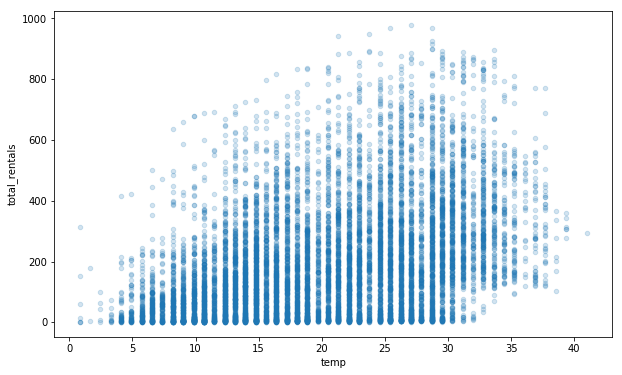

In [2]:
bikes.plot(kind='scatter', x='temp', y='total_rentals', alpha=0.2, figsize=(10, 6));

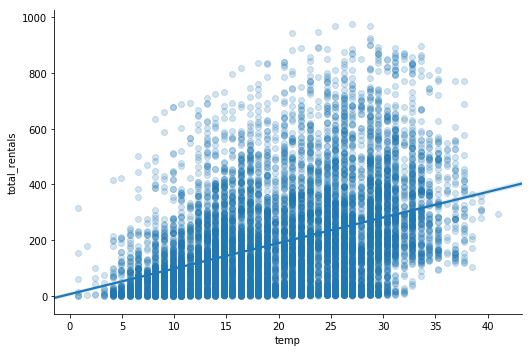

In [3]:
sns.lmplot(x='temp', y='total_rentals', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2});

#### Train-test split

In [4]:
from sklearn.model_selection import train_test_split

X = bikes[["temp", "humidity","windspeed"]]
y = bikes["total_rentals"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

7620 3266
7620 3266


#### Fit a linear regression

Remember the `.values.reshape()` is only required if you have **only one** predictor

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train.values, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Make predictions

In [6]:
y_pred = model.predict(X_test.values)
y_pred

array([309.65497935,  71.91946758, 139.79242061, ..., 165.62896456,
       303.13893444,   9.29675872])

#### Evaluate predictions

In [7]:
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 116.74652856544766
MSE: 24410.506936515674
RMSE: 156.2386217825659


#### Try a dumb "mean-only" model

In [8]:
y_pred_mean = [y_train.mean()] * len(y_test)

print('RMSE (model):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE: (dumb model):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mean)))

RMSE (model): 156.2386217825659
RMSE: (dumb model): 180.39056667845088
